In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
plt.style.use(['notebook','grid'])

In [8]:
df = pd.read_csv('AnsatzR500.txt',sep = '\s+',names =['U','V','M_u','M_v','M_n','Phi','Theta'])
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_824058/3322371423.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('AnsatzR500.txt',sep = '\s+',names =['U','V','M_u','M_v','M_n','Phi','Theta'])


,U,V,M_u,M_v,M_n,Phi,Theta
0,0.412410,1.892575,0.999941,0.010854,-0.000615,-0.056630,0.010872
1,0.416151,1.870461,0.999924,0.012328,-0.000694,-0.056224,0.012348
2,0.419880,1.847849,0.999948,0.010231,0.000465,0.045389,0.010242
3,0.421548,1.898254,0.999945,0.010505,0.000652,0.062033,0.010525
4,0.423596,1.824749,0.999942,0.010770,0.000379,0.035150,0.010777


<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_824058/2052780487.py:21: SyntaxWarning: invalid escape sequence '\p'
  return f'{x/np.pi:.0f}$\pi$'


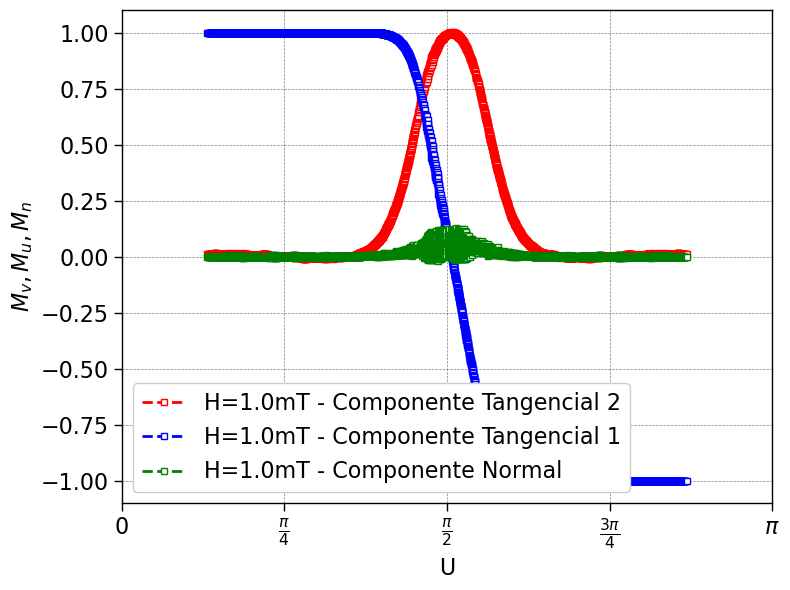

In [9]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Função para formatar os ticks do eixo x, por exemplo, em frações de pi
def x_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi:
        return r'$\pi$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 3 * np.pi / 2:
        return r'$\frac{3\pi}{2}$'
    elif x == np.pi / 4:
        return r'$\frac{\pi}{4}$'
    elif x == 3 * np.pi / 4:
        return r'$\frac{3\pi}{4}$'
    else:
        return f'{x/np.pi:.0f}$\pi$'

# Função para suavizar as colunas numéricas
def smooth_dataframe(df, window_length=5, polyorder=3):
    for column in df.select_dtypes(include=[np.number]).columns:
        df[f'{column}_smoothed'] = savgol_filter(df[column], window_length=window_length, polyorder=polyorder)
    return df

# Suavizando todas as colunas numéricas
df = smooth_dataframe(df, window_length=5, polyorder=3)

# Calculando a diferença entre o valor original e o suavizado para M_u (como exemplo)
df['M_u_diff'] = np.abs(df['M_u'] - df['M_u_smoothed'])

# Definindo um limite para considerar um ponto como outlier
threshold = df['M_u_diff'].quantile(0.95)  # Usando o 95º percentil para detectar outliers

# Filtrando os dados removendo os outliers
df_filtered = df[df['M_u_diff'] <= threshold]

# Plotando os gráficos com as colunas suavizadas
plt.plot(df_filtered['U_smoothed'], df_filtered['M_v_smoothed'], 'r--', marker='s', mec='r', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 2')
plt.plot(df_filtered['U_smoothed'], df_filtered['M_u_smoothed'], 'b--', marker='s', mec='b', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 1')
plt.plot(df_filtered['U_smoothed'], df_filtered['M_n_smoothed'], 'g--', marker='s', mec='g', mfc='w', markersize=5, label='H=1.0mT - Componente Normal')

# Ajustando os limites do eixo X
plt.xlim(0, np.pi)  # Alterando os limites do eixo X (por exemplo, de 0 a 2pi)

# Ajustando os ticks do eixo X para que eles apareçam em frações de pi
ticks_x = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]  # Ticks para 0 até 2pi
plt.xticks(ticks_x)  # Define os valores dos ticks

# Ajustando o formato dos ticks do eixo X
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_pi_formatter))


# Ajustando a legenda para garantir que não seja cortada
plt.legend()
plt.xlabel("U")
plt.ylabel("$M_v, M_u, M_n$")
plt.rcParams['legend.fontsize'] = 10

# Ajuste de layout para evitar que a legenda seja cortada
plt.tight_layout()

# Salvando o gráfico com maior qualidade e sem cortar a legenda
#plt.savefig('MagnetizaçãoGeralR500', dpi=1000, bbox_inches='tight') 


In [10]:
df2 = pd.read_csv('AnsatzR400.txt',sep = '\s+',names =['U','V','M_u','M_v','M_n','Phi','Theta'])
df2.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_824058/2961863153.py:1: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('AnsatzR400.txt',sep = '\s+',names =['U','V','M_u','M_v','M_n','Phi','Theta'])


,U,V,M_u,M_v,M_n,Phi,Theta
0,0.463648,1.890477,0.999956,-0.009396,0.000528,3.085423,0.009411
1,0.468235,1.865742,0.999979,-0.006490,0.000106,3.125292,0.006491
2,0.472801,1.840400,0.999967,-0.008077,0.001323,2.979294,0.008185
3,0.475141,1.889775,0.999969,-0.007624,0.002138,2.868251,0.007918
4,0.477345,1.814466,0.999973,-0.007170,0.001433,2.944262,0.007311


<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_824058/868330015.py:21: SyntaxWarning: invalid escape sequence '\p'
  return f'{x/np.pi:.0f}$\pi$'


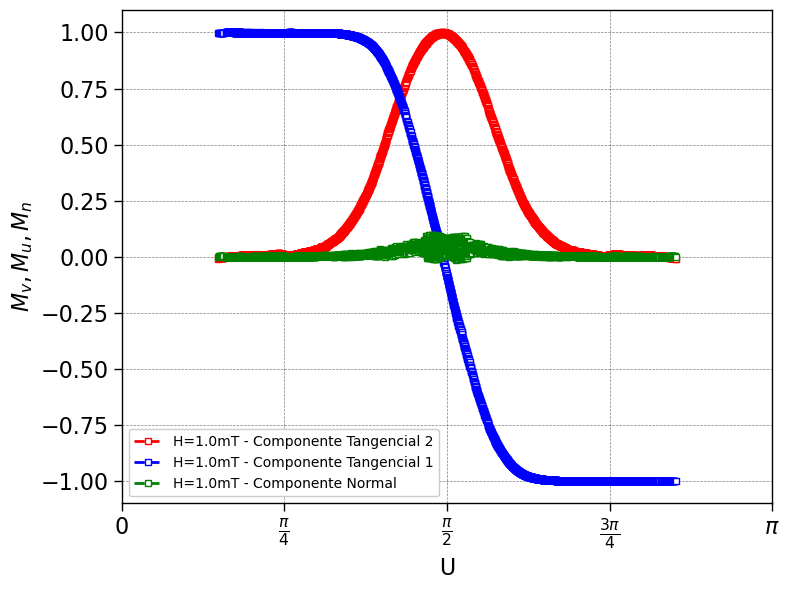

In [11]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Função para formatar os ticks do eixo x, por exemplo, em frações de pi
def x_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi:
        return r'$\pi$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 3 * np.pi / 2:
        return r'$\frac{3\pi}{2}$'
    elif x == np.pi / 4:
        return r'$\frac{\pi}{4}$'
    elif x == 3 * np.pi / 4:
        return r'$\frac{3\pi}{4}$'
    else:
        return f'{x/np.pi:.0f}$\pi$'

# Função para suavizar as colunas numéricas
def smooth_dataframe(df2, window_length=11, polyorder=4):  # Aumentando o window_length e polyorder
    for column in df2.select_dtypes(include=[np.number]).columns:
        df2[f'{column}_smoothed'] = savgol_filter(df2[column], window_length=window_length, polyorder=polyorder)
    return df2

# Suavizando todas as colunas numéricas com novos parâmetros
df2 = smooth_dataframe(df2, window_length=11, polyorder=4)

# Calculando a diferença entre o valor original e o suavizado para M_u (como exemplo)
df2['M_u_diff'] = np.abs(df2['M_u'] - df2['M_u_smoothed'])

# Definindo um limite para considerar um ponto como outlier
threshold = df2['M_u_diff'].quantile(0.95)  # Usando o 95º percentil para detectar outliers

# Filtrando os dados removendo os outliers
df2_filtered = df2[df2['M_u_diff'] <= threshold]

# Plotando os gráficos com as colunas suavizadas
plt.plot(df2_filtered['U_smoothed'], df2_filtered['M_v_smoothed'], 'r--', marker='s', mec='r', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 2')
plt.plot(df2_filtered['U_smoothed'], df2_filtered['M_u_smoothed'], 'b--', marker='s', mec='b', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 1')
plt.plot(df2_filtered['U_smoothed'], df2_filtered['M_n_smoothed'], 'g--', marker='s', mec='g', mfc='w', markersize=5, label='H=1.0mT - Componente Normal')

# Ajustando os limites do eixo X
plt.xlim(0, np.pi)  # Alterando os limites do eixo X (por exemplo, de 0 a 2pi)

# Ajustando os ticks do eixo X para que eles apareçam em frações de pi
ticks_x = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]  # Ticks para 0 até 2pi
plt.xticks(ticks_x)  # Define os valores dos ticks

# Ajustando o formato dos ticks do eixo X
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_pi_formatter))


# Ajustando a legenda para garantir que não seja cortada
plt.legend()
plt.xlabel("U")
plt.ylabel("$M_v, M_u, M_n$")
plt.rcParams['legend.fontsize'] = 10

# Ajuste de layout para evitar que a legenda seja cortada
plt.tight_layout()

# Salvando o gráfico com maior qualidade e sem cortar a legenda
#plt.savefig('MagnetizaçãoGeralR400', dpi=1000, bbox_inches='tight')



<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_17769/389793598.py:21: SyntaxWarning: invalid escape sequence '\p'
  return f'{x/np.pi:.0f}$\pi$'


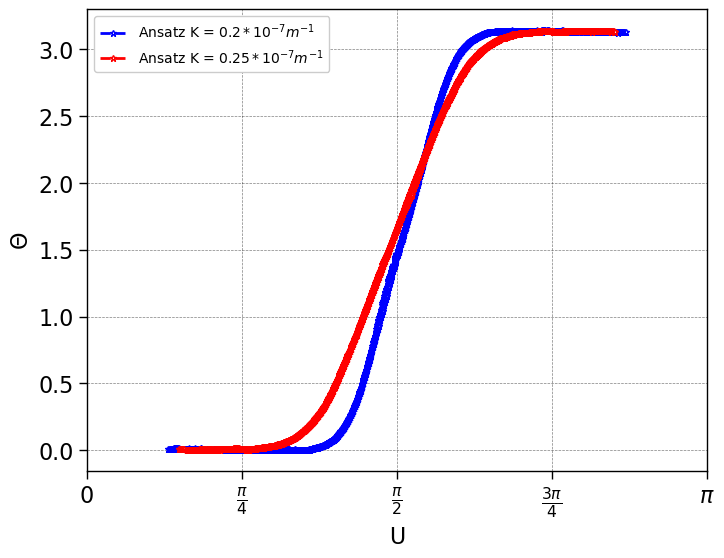

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.ticker import FuncFormatter

# Função para formatar os ticks do eixo x, por exemplo, em frações de pi
def x_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi:
        return r'$\pi$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 3 * np.pi / 2:
        return r'$\frac{3\pi}{2}$'
    elif x == np.pi / 4:
        return r'$\frac{\pi}{4}$'
    elif x == 3 * np.pi / 4:
        return r'$\frac{3\pi}{4}$'
    else:
        return f'{x/np.pi:.0f}$\pi$'

# Suavizando as colunas 'Theta' usando o filtro de Savitzky-Golay
df['Theta_smoothed'] = savgol_filter(df['Theta'], window_length=11, polyorder=4)
df2['Theta_smoothed'] = savgol_filter(df2['Theta'], window_length=11, polyorder=4)

# Plotando as duas curvas suavizadas com marcadores
plt.plot(df['U'], df['Theta_smoothed'], 'b--', marker='*', mec='b', mfc='w', markersize=5, label='Ansatz K = $0.2*10^{-7}m^{-1}$')
plt.plot(df2['U'], df2['Theta_smoothed'], 'r--', marker='*', mec='r', mfc='w', markersize=5, label='Ansatz K = $0.25*10^{-7}m^{-1}$')

# Ajustando os limites do eixo X
plt.xlim(0, np.pi)  # Alterando os limites do eixo X (por exemplo, de 0 a 2pi)

# Ajustando os ticks do eixo X para que eles apareçam em frações de pi
ticks_x = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]  # Ticks para 0 até 2pi
plt.xticks(ticks_x)  # Define os valores dos ticks

# Ajustando o formato dos ticks do eixo X
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_pi_formatter))


# Configuração da legenda
plt.legend()

# Configuração do rótulo do eixo x e y
plt.xlabel("U")
plt.ylabel("$\\Theta$")

# Ajustando o tamanho da fonte da legenda
plt.rcParams['legend.fontsize'] = 10

# Salvando o gráfico com qualidade alta
plt.savefig('Smoothed_Plot', dpi=1000)

# Exibindo o gráfico
plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_824058/1381382882.py:21: SyntaxWarning: invalid escape sequence '\p'
  return f'{x/np.pi:.0f}$\pi$'
/tmp/ipykernel_824058/1381382882.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Phi_smoothed'] = savgol_filter(df_cleaned['Phi'], window_length=11, polyorder=4)
/tmp/ipykernel_824058/1381382882.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Phi_smoothed'] = 

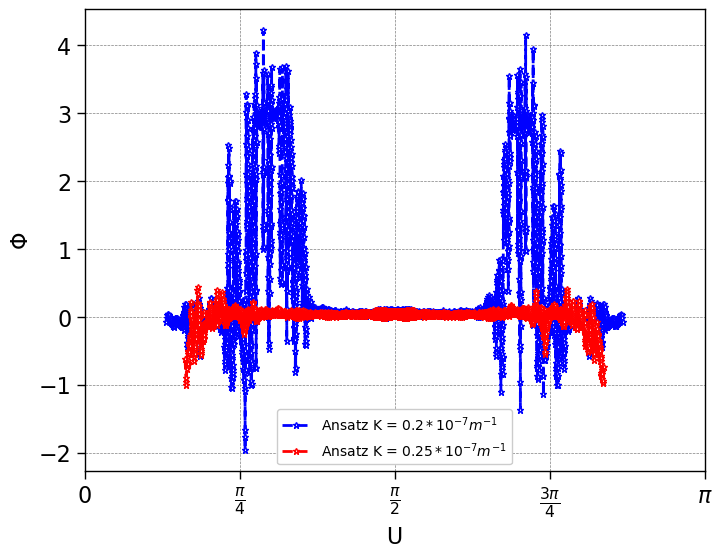

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.ticker import FuncFormatter

# Função para formatar os ticks do eixo x, por exemplo, em frações de pi
def x_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi:
        return r'$\pi$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 3 * np.pi / 2:
        return r'$\frac{3\pi}{2}$'
    elif x == np.pi / 4:
        return r'$\frac{\pi}{4}$'
    elif x == 3 * np.pi / 4:
        return r'$\frac{3\pi}{4}$'
    else:
        return f'{x/np.pi:.0f}$\pi$'

# Função para remover outliers com base no desvio padrão
def remove_outliers(df, threshold=3):
    mean_phi = np.mean(df['Phi'])
    std_phi = np.std(df['Phi'])
    
    # Identificando outliers: pontos que estão além de 3 desvios padrão da média
    mask = np.abs(df['Phi'] - mean_phi) <= threshold * std_phi
    return df[mask]

# Remover outliers antes de aplicar a suavização
df_cleaned = remove_outliers(df, threshold=3)
df2_cleaned = remove_outliers(df2, threshold=3)

# Suavizando as colunas 'Phi' usando o filtro de Savitzky-Golay
df_cleaned['Phi_smoothed'] = savgol_filter(df_cleaned['Phi'], window_length=11, polyorder=4)
df2_cleaned['Phi_smoothed'] = savgol_filter(df2_cleaned['Phi'], window_length=11, polyorder=4)

# Plotando as duas curvas suavizadas com marcadores
plt.plot(df_cleaned['U'], df_cleaned['Phi_smoothed'], 'b--', marker='*', mec='b', mfc='w', markersize=5, label='Ansatz K = $0.2*10^{-7}m^{-1}$')
plt.plot(df2_cleaned['U'], df2_cleaned['Phi_smoothed'], 'r--', marker='*', mec='r', mfc='w', markersize=5, label='Ansatz K = $0.25*10^{-7}m^{-1}$')

# Ajustando os limites do eixo X
plt.xlim(0, np.pi)  # Alterando os limites do eixo X (por exemplo, de 0 a pi)

# Ajustando os ticks do eixo X para que eles apareçam em frações de pi
ticks_x = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]  # Ticks para 0 até pi
plt.xticks(ticks_x)  # Define os valores dos ticks

# Ajustando o formato dos ticks do eixo X
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_pi_formatter))

# Configuração da legenda
plt.legend()

# Configuração do rótulo do eixo x e y
plt.xlabel("U")
plt.ylabel("$\\Phi$")

# Ajustando o tamanho da fonte da legenda
plt.rcParams['legend.fontsize'] = 10

# Salvando o gráfico com qualidade alta
#plt.savefig('Smoothed_Plot_Without_Outliers', dpi=1000)

# Exibindo o gráfico
plt.show()


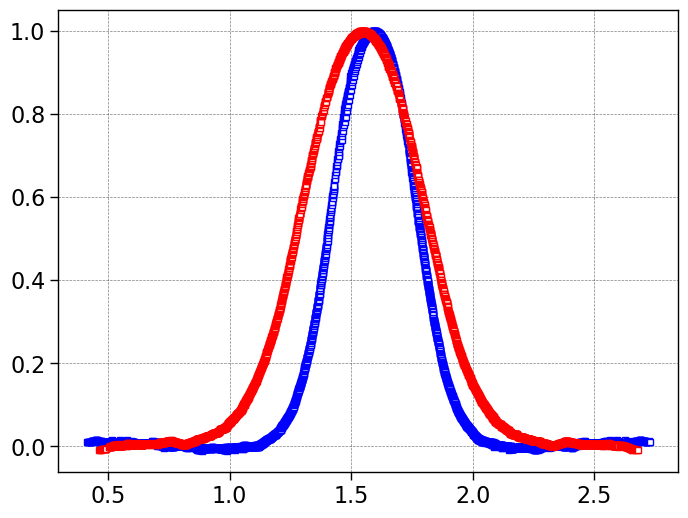

In [60]:
plt.plot(df_filtered['U_smoothed'], df_filtered['M_v_smoothed'], 'b--', marker='s', mec='b', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 1')
plt.plot(df2_filtered['U_smoothed'], df2_filtered['M_v_smoothed'], 'r--', marker='s', mec='r', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 2')

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_17769/3607117254.py:21: SyntaxWarning: invalid escape sequence '\p'
  return f'{x/np.pi:.0f}$\pi$'


Pontos de Interseção - Componente Tangencial 1:
      U_smoothed  M_v_smoothed
2707    1.389522      0.450191
2709    1.390219      0.451451
2711    1.390943      0.456131
2712    1.391303      0.454161
2713    1.391656      0.459190
...          ...           ...
3872    1.799022      0.456402
3873    1.799402      0.455446
3874    1.799678      0.451856
3875    1.799998      0.450226
3876    1.800282      0.450243

[132 rows x 2 columns]

Pontos de Interseção - Componente Tangencial 2:
      U_smoothed  M_v_smoothed
1712    1.248374      0.450659
1718    1.251325      0.454944
1719    1.251674      0.455070
1720    1.251932      0.450010
1721    1.252434      0.450307
...          ...           ...
3098    1.848879      0.457853
3099    1.849338      0.457369
3100    1.849783      0.450839
3101    1.850219      0.451991
3102    1.850699      0.450408

[166 rows x 2 columns]


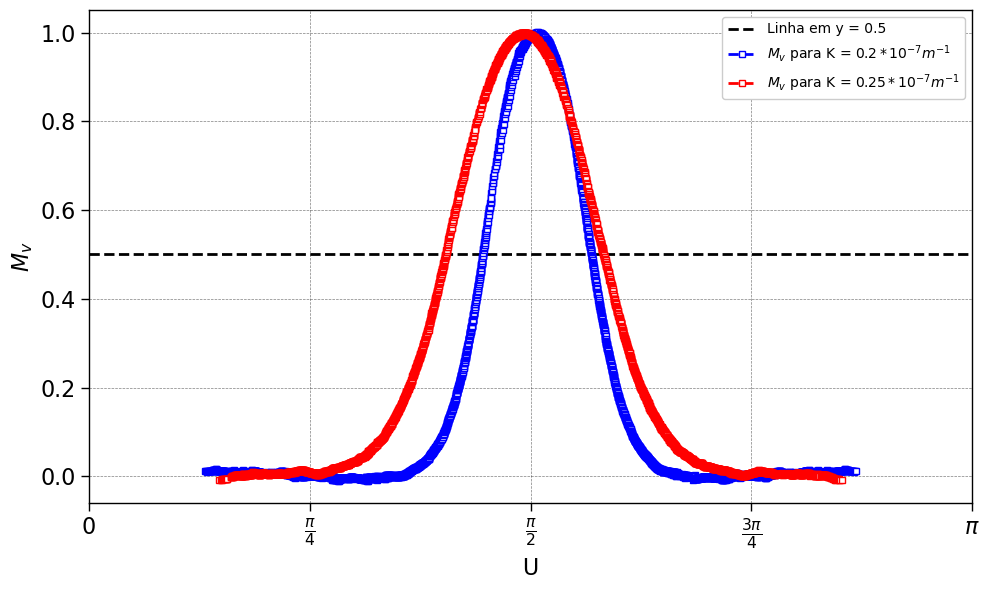

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Função para formatar os ticks do eixo x, por exemplo, em frações de pi
def x_pi_formatter(x, pos):
    if x == 0:
        return '0'
    elif x == np.pi:
        return r'$\pi$'
    elif x == np.pi / 2:
        return r'$\frac{\pi}{2}$'
    elif x == 3 * np.pi / 2:
        return r'$\frac{3\pi}{2}$'
    elif x == np.pi / 4:
        return r'$\frac{\pi}{4}$'
    elif x == 3 * np.pi / 4:
        return r'$\frac{3\pi}{4}$'
    else:
        return f'{x/np.pi:.0f}$\pi$'


# Função para encontrar os pontos de interseção com y = 0.5
def find_intersection_points(df, y_value=0.5, column_x='U_smoothed', column_y='M_v_smoothed'):
    # Encontrar os índices onde a linha cruza y=0.5
    diff = np.abs(df[column_y] - y_value)
    
    # Encontrando os índices mais próximos ao valor 0.5
    intersection_indices = diff[diff <= 0.05].index  # Você pode ajustar o limite para ser mais rigoroso
    
    # Coletando os valores de X e Y para os pontos de interseção
    intersection_points = df.loc[intersection_indices, [column_x, column_y]]
    
    return intersection_points

# Encontrando os pontos de interseção para os dois gráficos
intersection_points_1 = find_intersection_points(df_filtered, y_value=0.5, column_x='U_smoothed', column_y='M_v_smoothed')
intersection_points_2 = find_intersection_points(df2_filtered, y_value=0.5, column_x='U_smoothed', column_y='M_v_smoothed')

# Exibindo as tabelas com os pontos de interseção
print("Pontos de Interseção - Componente Tangencial 1:")
print(intersection_points_1)

print("\nPontos de Interseção - Componente Tangencial 2:")
print(intersection_points_2)

# Plotando os gráficos
plt.figure(figsize=(10, 6))

# Plotando a linha pontilhada no valor y=0.5
plt.axhline(y=0.5, color='black', linestyle='--', label="Linha em y = 0.5")

# Plotando as duas curvas
plt.plot(df_filtered['U_smoothed'], df_filtered['M_v_smoothed'], 'b--', marker='s', mec='b', mfc='w', markersize=5, label='$M_v$ para K = $0.2*10^{-7}m^{-1}$ ')
plt.plot(df2_filtered['U_smoothed'], df2_filtered['M_v_smoothed'], 'r--', marker='s', mec='r', mfc='w', markersize=5, label='$M_v$ para K = $0.25*10^{-7}m^{-1}$')

# Ajustando os limites do eixo X
plt.xlim(0, np.pi)  # Alterando os limites do eixo X (por exemplo, de 0 a 2pi)

# Ajustando os ticks do eixo X para que eles apareçam em frações de pi
ticks_x = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]  # Ticks para 0 até 2pi
plt.xticks(ticks_x)  # Define os valores dos ticks

# Ajustando o formato dos ticks do eixo X
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_pi_formatter))


# Adicionando os pontos de interseção em preto
#plt.scatter(intersection_points_1['U_smoothed'], intersection_points_1['M_v_smoothed'], color='black', zorder=5, label='Pontos de Interseção - K = $1/500^{-9}$', marker='o', s=100)
#plt.scatter(intersection_points_2['U_smoothed'], intersection_points_2['M_v_smoothed'], color='black', zorder=5, label='Pontos de Interseção - K = $1/400^{-9}$', marker='o', s=100)

# Adicionando a legenda e labels
plt.legend()
plt.xlabel("U")
plt.ylabel("$M_v$")
plt.tight_layout()
plt.savefig('CálculoParede', dpi = 1000)


Resultados para o Componente Tangencial 1:
Média dos pontos à direita - U (x): 1.7878316752895755, M_v (y): 0.498662584942085
Média dos pontos à esquerda - U (x): 1.400578216748769, M_v (y): 0.4967346970443352
Subtração das médias - U (x): 0.3872534585408065, M_v (y): 0.0019278878977497804

Resultados para o Componente Tangencial 2:
Média dos pontos à direita - U (x): 1.8314302965497107, M_v (y): 0.4989889159302527
Média dos pontos à esquerda - U (x): 1.2673259108314647, M_v (y): 0.4955499233566722
Subtração das médias - U (x): 0.564104385718246, M_v (y): 0.0034389925735804905


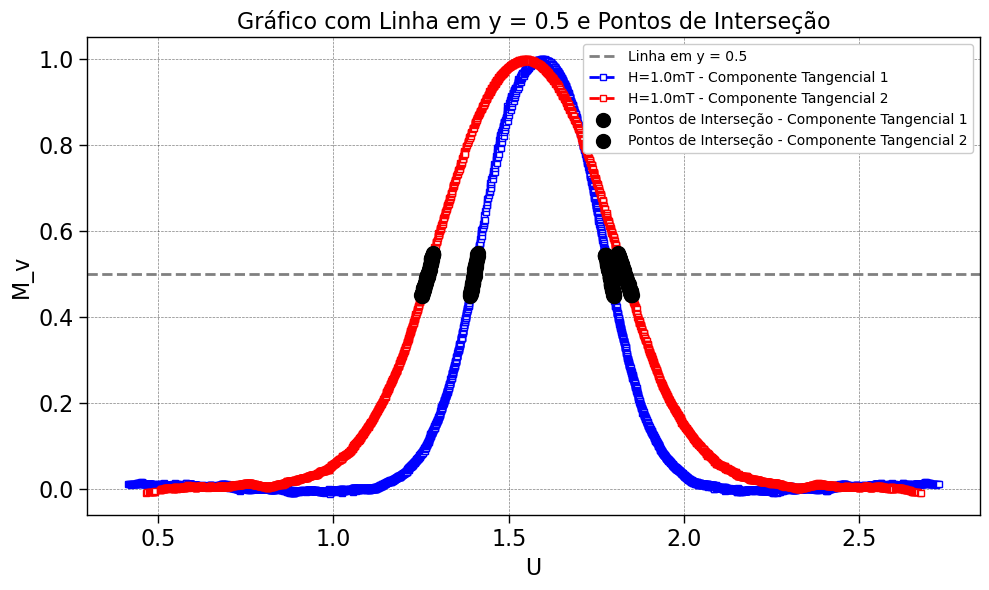

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para encontrar os pontos de interseção com y = 0.5
def find_intersection_points(df, y_value=0.5, column_x='U_smoothed', column_y='M_v_smoothed'):
    # Encontrar os índices onde a linha cruza y=0.5
    diff = np.abs(df[column_y] - y_value)
    
    # Encontrando os índices mais próximos ao valor 0.5
    intersection_indices = diff[diff <= 0.05].index  # Ajuste o limite conforme necessário
    
    # Coletando os valores de X e Y para os pontos de interseção
    intersection_points = df.loc[intersection_indices, [column_x, column_y]]
    
    return intersection_points

# Função para calcular a média dos pontos à direita e à esquerda da média de U
def calculate_mean_of_sides(intersection_points):
    # Média de U (x)
    mean_x = intersection_points['U_smoothed'].mean()
    
    # Dividindo os pontos em dois grupos (direita e esquerda)
    right_points = intersection_points[intersection_points['U_smoothed'] > mean_x]
    left_points = intersection_points[intersection_points['U_smoothed'] < mean_x]
    
    # Calculando as médias de U (x) e M_v (y) para os pontos à direita e à esquerda
    mean_x_right = right_points['U_smoothed'].mean()
    mean_y_right = right_points['M_v_smoothed'].mean()
    
    mean_x_left = left_points['U_smoothed'].mean()
    mean_y_left = left_points['M_v_smoothed'].mean()
    
    # Calculando a subtração das médias
    sub_x = mean_x_right - mean_x_left
    sub_y = mean_y_right - mean_y_left
    
    return mean_x_right, mean_y_right, mean_x_left, mean_y_left, sub_x, sub_y

# Encontrando os pontos de interseção para os dois gráficos
intersection_points_1 = find_intersection_points(df_filtered, y_value=0.5, column_x='U_smoothed', column_y='M_v_smoothed')
intersection_points_2 = find_intersection_points(df2_filtered, y_value=0.5, column_x='U_smoothed', column_y='M_v_smoothed')

# Calculando as médias e a subtração para os pontos à direita e à esquerda
mean_x_r1, mean_y_r1, mean_x_l1, mean_y_l1, sub_x_1, sub_y_1 = calculate_mean_of_sides(intersection_points_1)
mean_x_r2, mean_y_r2, mean_x_l2, mean_y_l2, sub_x_2, sub_y_2 = calculate_mean_of_sides(intersection_points_2)

# Exibindo os resultados
print("Resultados para o Componente Tangencial 1:")
print(f"Média dos pontos à direita - U (x): {mean_x_r1}, M_v (y): {mean_y_r1}")
print(f"Média dos pontos à esquerda - U (x): {mean_x_l1}, M_v (y): {mean_y_l1}")
print(f"Subtração das médias - U (x): {sub_x_1}, M_v (y): {sub_y_1}")

print("\nResultados para o Componente Tangencial 2:")
print(f"Média dos pontos à direita - U (x): {mean_x_r2}, M_v (y): {mean_y_r2}")
print(f"Média dos pontos à esquerda - U (x): {mean_x_l2}, M_v (y): {mean_y_l2}")
print(f"Subtração das médias - U (x): {sub_x_2}, M_v (y): {sub_y_2}")

# Plotando os gráficos
plt.figure(figsize=(10, 6))

# Plotando a linha pontilhada no valor y=0.5
plt.axhline(y=0.5, color='gray', linestyle='--', label="Linha em y = 0.5")

# Plotando as duas curvas
plt.plot(df_filtered['U_smoothed'], df_filtered['M_v_smoothed'], 'b--', marker='s', mec='b', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 1')
plt.plot(df2_filtered['U_smoothed'], df2_filtered['M_v_smoothed'], 'r--', marker='s', mec='r', mfc='w', markersize=5, label='H=1.0mT - Componente Tangencial 2')

# Adicionando os pontos de interseção em preto
plt.scatter(intersection_points_1['U_smoothed'], intersection_points_1['M_v_smoothed'], color='black', zorder=5, label='Pontos de Interseção - Componente Tangencial 1', marker='o', s=100)
plt.scatter(intersection_points_2['U_smoothed'], intersection_points_2['M_v_smoothed'], color='black', zorder=5, label='Pontos de Interseção - Componente Tangencial 2', marker='o', s=100)

# Adicionando a legenda e labels
plt.legend()
plt.xlabel("U")
plt.ylabel("M_v")
plt.title("Gráfico com Linha em y = 0.5 e Pontos de Interseção")
plt.tight_layout()
plt.show()


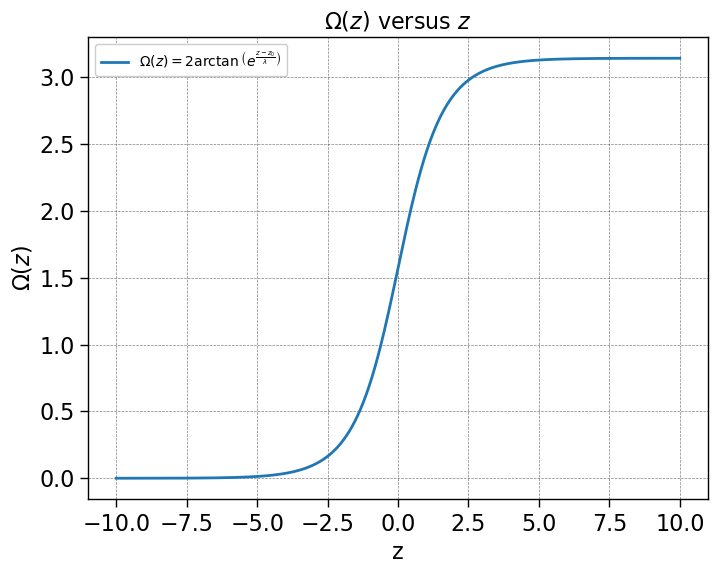

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Definir as constantes
lambda_ = 1.0  # valor de lambda (exemplo)
z0 = 0.0  # valor de z0 (exemplo)

# Definir o intervalo de z
z_values = np.linspace(-10, 10, 400)  # Intervalo de z de -10 a 10

# Calcular Omega(z) usando a fórmula dada
Omega_values = 2 * np.arctan(np.exp((z_values - z0) / lambda_))

# Plotar
plt.plot(z_values, Omega_values, label=r'$\Omega(z) = 2 \arctan\left(e^{\frac{z - z_0}{\lambda}}\right)$')

# Adicionar título e rótulos aos eixos
plt.title(r'$\Omega(z)$ versus $z$')
plt.xlabel('z')
plt.ylabel(r'$\Omega(z)$')

# Mostrar a legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\k'
<>:23: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_584634/2103999585.py:23: SyntaxWarning: invalid escape sequence '\k'
  plt.ylabel("Curvatura Gaussiana $\kappa_G$")


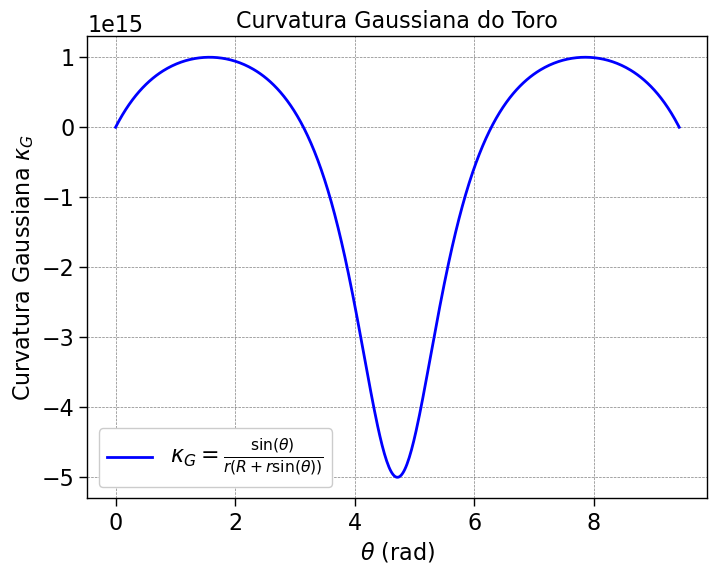

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros do toro
R = 30e-9  # Raio maior do toro em metros (30 nm)
r = 20e-9  # Raio menor da seção do toro em metros (20 nm)

# Função para calcular a curvatura gaussiana
def gauss_curvature(theta):
    return (np.sin(theta) / r) * (1 / (R + r * np.sin(theta)))

# Definir o intervalo de θ
theta_values = np.linspace(0, 3* np.pi, 500)

# Calcular os valores de curvatura gaussiana para cada θ
curvature_values = gauss_curvature(theta_values)

# Plotar a curvatura gaussiana
plt.figure(figsize=(8, 6))
plt.plot(theta_values, curvature_values, label=r'$\kappa_G = \frac{\sin(\theta)}{r(R + r\sin(\theta))}$', color='b')
plt.title("Curvatura Gaussiana do Toro")
plt.xlabel(r"$\theta$ (rad)")
plt.ylabel("Curvatura Gaussiana $\kappa_G$")
plt.grid(True)
plt.legend()
plt.show()


<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\k'
<>:30: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_824058/3458746461.py:30: SyntaxWarning: invalid escape sequence '\k'
  axes[0].set_ylabel("Curvatura Gaussiana $\kappa_G$")
/tmp/ipykernel_824058/3458746461.py:38: SyntaxWarning: invalid escape sequence '\k'
  axes[1].set_ylabel("Curvatura Média $\kappa_M$")


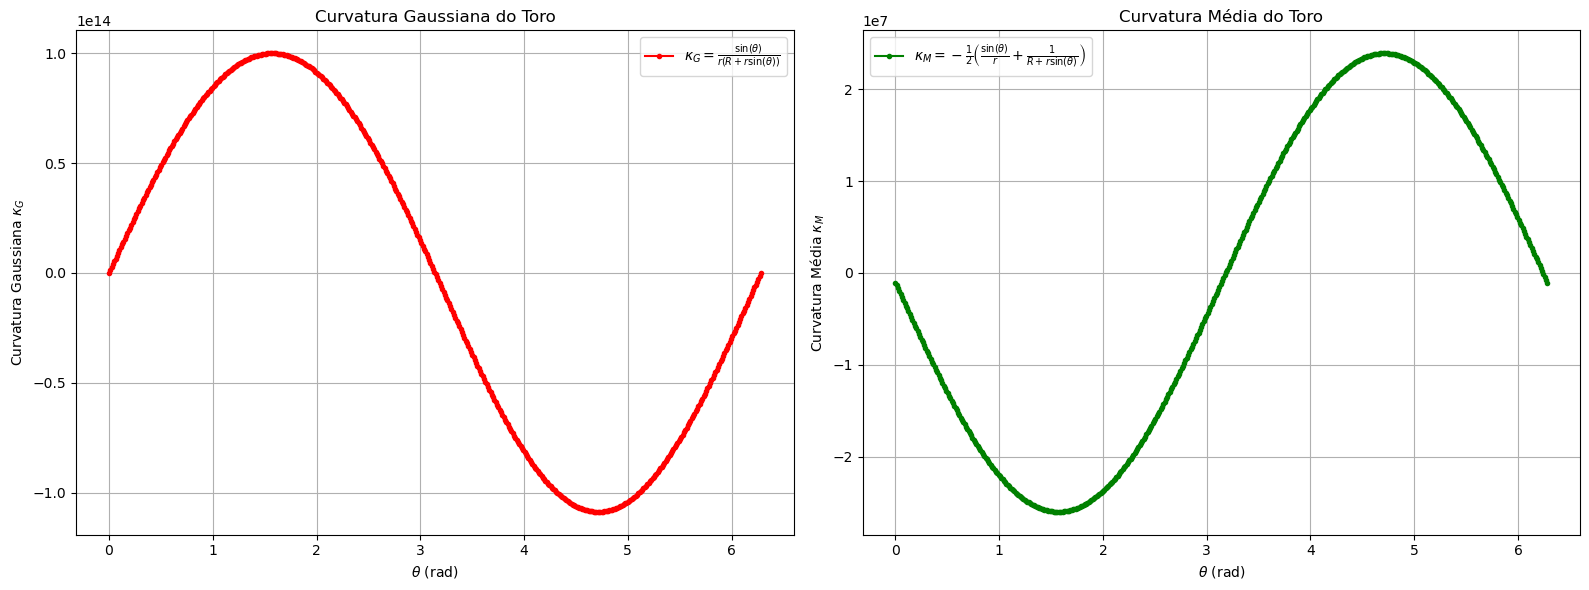

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros do toro
R = 480e-9  # Raio maior do toro em metros (30 nm)
r = 20e-9  # Raio menor da seção do toro em metros (20 nm)

# Função para calcular a curvatura gaussiana
def gauss_curvature(theta):
    return (np.sin(theta) / r) * (1 / (R + r * np.sin(theta)))

# Função para calcular a curvatura média
def mean_curvature(theta):
    return -0.5 * (np.sin(theta) / r + 1 / (R + r * np.sin(theta)))

# Definir o intervalo de θ
theta_values = np.linspace(0, 2 * np.pi, 500)

# Calcular os valores de curvatura gaussiana e média para cada θ
gauss_values = gauss_curvature(theta_values)
mean_values = mean_curvature(theta_values)

# Criar subgráficos (figura com 1 linha e 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotar a curvatura gaussiana no primeiro subgráfico
axes[0].plot(theta_values, gauss_values, label=r'$\kappa_G = \frac{\sin(\theta)}{r(R + r\sin(\theta))}$',marker='o', color='r', linestyle='-', markersize=2, markerfacecolor='r', markeredgewidth=2)
axes[0].set_title("Curvatura Gaussiana do Toro")
axes[0].set_xlabel(r"$\theta$ (rad)")
axes[0].set_ylabel("Curvatura Gaussiana $\kappa_G$")
axes[0].grid(True)
axes[0].legend()

# Plotar a curvatura média no segundo subgráfico
axes[1].plot(theta_values, mean_values, label=r'$\kappa_M = -\frac{1}{2} \left( \frac{\sin(\theta)}{r} + \frac{1}{R + r\sin(\theta)} \right)$', color='g',marker='o',linestyle='-', markersize=2, markerfacecolor='g', markeredgewidth=2)
axes[1].set_title("Curvatura Média do Toro")
axes[1].set_xlabel(r"$\theta$ (rad)")
axes[1].set_ylabel("Curvatura Média $\kappa_M$")
axes[1].grid(True)
axes[1].legend()

# Ajustar o layout para não sobrepor os gráficos
plt.tight_layout()
#plt.savefig('KG&KM', dpi = 1000)
